# Verdadero o falso (justificar en caso de falso):

### El desbalance de clases puede generar un modelo con alta accuracy pero bajo recall para la clase minoritaria **Verdadero**

Ya que si tenemos un set de datos que tiene un 99% de elementos de la clase "buena" (clase mayoritaria), tendra un **Accuracy** alto ya que el modelo sera capaz de predecir la clase "Buena" siempre, PERO no predice la clase "mala" (minoritaria), por lo que tendra un **Recall** bajo para la clase minoritaria. El modelo es completamente inutil, ya que de todos los casos malos no es capas de predecir ninguno.

### La función de activación softmax se suele usar en la capa de salida de problemas de clasificación multiclase. **Verdadero**

La función Softmax es una función de activación que se usa casi exclusivamente en la capa de salida de una red neuronal para problemas de clasificación multiclase.

Su trabajo es tomar un vector de números reales (llamados logits) que produce la red y convertirlos en una distribución de probabilidad.

En simple:

* Toma las "puntuaciones" crudas de la red para cada clase.

* Las transforma en probabilidades que van de 0 a 1.

* Asegura que la suma de todas las probabilidades sea exactamente 1.

De esta manera, la salida del modelo te dice: "Hay un 70% de probabilidad de que sea la clase A, un 20% de que sea la clase B y un 10% de que sea la clase C".

### SGD con un learning rate muy alto puede hacer que la red nunca converja **Verdadero**

SGD es sencible a la tasa de aprendizaje:
* $\eta$ alto -> diverge, ya que puede oscilar y alejarse del minimo.
* $\eta$ bajo -> convergencia lente

### El F1 Score combina la precisión y el recall en una sola métrica. **Verdadero**

Por def es la media armonica de la **Precision** y **Recall**
$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$


### La curva de pérdida durante el entrenamiento debería ser siempre decreciente sin oscilaciones. **Falso**

Idealmente queremos que la curva de perdida sea decreciente, pero ademas, concava hacia arriba. 
Ademas en la practica podemos tener oscilaciones que se deben al ruido del entrenamiento.

Este reuido puede provenir de:
* Eleccion del tamaño de los batch
* Del Dropout

### Los pesos de una red neuronal se inicializan generalmente en cero para facilitar la simetría. **Falso**

Inicializar los W_i = 0, no facilita la simetria, si no que la impone e impide que la red aprenda.

Problema de la simetria:
* Si todos los W_i que entran en una capa oculta es 0, todas las neuronas reciben la misma entrada.

* Dado que reciben la misma entrada, tienen la mismfa g(z), producen la misma salida.

* Durante el backpropagation, el error se propaga hacia atras. Como todas las neuronas produjeron la misma salida, a todas se les asigna la misma "culpa" por el error. Por lo tanto, el gradiente ("la correcion") calculado para cada iteracion es el mismo.

* Al actualizar los pesos $w = w - \eta \times \text{gradiente}$, como el gradiente es el mismo para todos, todos los pesos se actualizan al mismo valor.

En efecto: las neuronas se quedan atascadas juntas. En la siguiente iteracion, vuelven a tener los mismos pesos (!= 0 pero iguales en todas las neuronas), reciben las mismas entradas, producen la misma salida, y se obtienen los mismos gradientes.

En resumen, la red no puede aprender. Es como si toda la capa actuara como una sola neurona.

### La técnica de early stopping ayuda a evitar sobreajuste deteniendo el entrenamiento cuando no mejora la validación **Verdadero**

Es una tecnica que detiene de forma automatica el entrenamiento de una red neuronal cuando el modelo deja de mejorar en los datos de validacion.

Cuando entrenamos un modelo con muchas epocas, el principio:
* la perdida de entrenamiento (loss) baja bien,
* y la perdida de validacion (val_loss) tambien baja.

Pero llega un punto en el:
* el modelo ya aprendio todo lo que podia generalizar,
* y empieza a memorizar el train_set (overfitting)

Entonces en ese punto, val_loss deja de bajar y empieza a subir.

**Early Stopping** detecta eso y detiene el entrenamiento justo antes de que comience el sobreajuste (overfitting)

### Dada la siguiente matriz de confusión (el eje vertical es la clase real y el horizontal laclase predicha): 
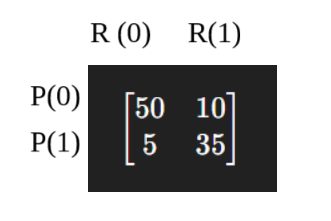 

### El accuracy es 85%, el recall 87,5%, precision 77,8%, y el F1 Score 0,875? **Falso**

In [9]:
tn = 50
fp = 10
fn = 5
tp = 35
total = tn + fp + fn +  tp

accuracy = (tp + tn)/total
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*((precision*recall)/(precision + recall))
print(f"Accuracy = TP + TN / Total = {accuracy*100}")
print(f"Presicion = TP / TP + FP = {precision*100:.2f}")
print(f"Recall = TP / TP + FN = {recall*100:.2f}")
print(f"F1 - Score = 2 * Presicion * Recall / (Presicion + recall) = {f1_score:.2f}")


Accuracy = TP + TN / Total = 85.0
Presicion = TP / TP + FP = 77.78
Recall = TP / TP + FN = 87.50
F1 - Score = 2 * Presicion * Recall / (Presicion + recall) = 0.82


### En un dataset altamente desbalanceado (990 negativos y 10 positivos), un modelo que siempre predice "negativo" alcanza un accuracy del 99% y un recall para la clase positiva de 0%. **Verdadero**


Tenemos 1000 datos en total:

Si el modelo siempre predice negativo:
* Acierta en 990 casos, que son los negativos.
* Falla en 10 casos, que son los positivos.

Acierto totales: 990 de 1000 

-> Accuracy = 990 / 1000 = 9.9 -> 99%

Habia 10 positivos en total:
* Predijo 0 casos positivos
* Casos positivos reales : 10

Para la clase minoritaria:
Recall = 0 / 10 = 0 -> 0%



#### Batch size grande reduce ruido estocástico y puede llevar a convergencia más lenta en generalización; batches pequeños añaden ruido que a veces ayuda a generalizar **Verdadero**

El batch_size es uno de los parametros mas influyentes en el comportamiento del entrenamiento de una red neuronal.

Cuando se entrena el modelo, no se actualiza los pesos despues de cada muestro individual, si no despues de procesar un lote de ejemplos (batch).

Batch_size pequeño -> entrenamiento mas ruidoso pero mas generalizador.

* Pequeño (8 - 32):
    - Los gradientes cambian mucho entre los lotes -> curvas de perdida con picos y oscilaciones (ruido estocastico)
    - Pero ese ruido ayuda a escapar de minimos locales y a mejorar la generalizacion.
    - Mas rapido por actualizacion, pero necesitas mas actualizaciones totales.
    - Curve tipica: con picos (serrucho), pero converge bien.

* Grande (64 - 256 o mas)
    - Promedias mas ejemplos por paso, gradientes mas suaves y estables.
    - Curvas de perdida y accuracy mas limpias y suaves.
    - El modelo puede aprender patrones especificos del dataset (riesgo de overfitting)
    - Requiere mas memoria y aveces converge hacia minimos menos optimos.
    - Curva tipica: suave, pero puede estancarse o sobreajustar.

#### Si durante el entrenamiento se observa que el loss en entrenamiento = 0.1 y el loss en validación = 0.5, es posible que el modelo esté sobreajustando. **Verdadero**


Ya que si el modelo no estaria sobreajustando, el loss_train y el loss_validation deberian tener aproximadamente el mismo valor.

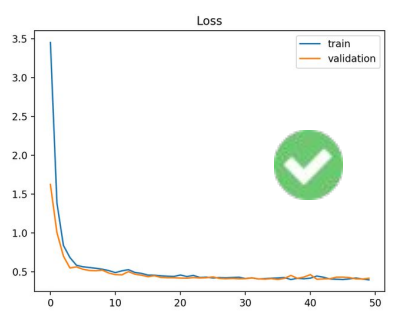

Cuando el loss_train sigue disminuyendo y el loss_validation aumenta, estamos entrando a una zona de sobreajuste u overfitting.

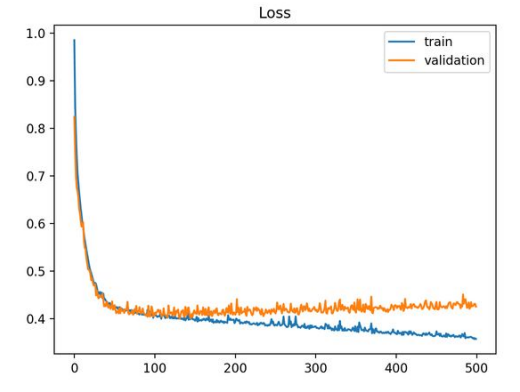

#### Una red neuronal bien entrenada puede alcanzar 100% de accuracy en datos de test sin riesgo de sobreajuste **Falso**

Un 100% de accuracy en el test_set no implica sobreajuste. 

El sobreajuste se da cuando el modelo memoriza los datos de entrenamiento, a los que puede predecir siempre, pero tiene malos resultaos en los datos de prueba.

Tener un 100% de accuracy en el test_set casi nunca significa que creamos el modelo perfecto, si no que hay errores en el modelo:

* Data Leakage (fuga de datos): Causa mas probable. Significa que por accidente muestras del conjunto de prueba (x_test) tambien estaban presente el conjunto de entrenamiento (x_train). Entonces el modelo no esta "prediciendo" datos nuevos, simplemente esta recordando datos que ya memorizo.

* El problema es trivial: el patron era tan facil que no necesitaba una red neuronal.

* Datos ruidosos: los datos del mundo real siempre tienen ruido o ambiguedad. Un modelo que acerita el 100% es probable que haya aprendido patrones que no son reales.

En sistensis, un 100% de accuracy en el test_set no es subreajuste, pero casi siempre significa algun error en la preparacion de los datos.



#### Una red neuronal con 1 capa oculta de 5 neuronas y función de activación sigmoide puede aproximar funciones no lineales. **Verdadero**


Aproximar funciones no lineales es justamente lo que hacemos con redes neuronales.

La capacidad de una red para aproximar fn no lineales proviene de su funcion de activacion, las cuales son no lineales. 

* Por def la funcion sigmoide es no lineal.

#### Una red con 10 capas ocultas y 2 neuronas por capa tiene mayor capacidad de representación que una red con 2 capas ocultas y 100 neuronas cada una. **FALSO**

Una red ancha y poco profunda (2 capas de 100 neuronas) tiene mayor capacidad de representacion, ya que cada capa tiene muchas combinaciones de posibles pesos. 

Puede modelar una gran variedad de relaciones entre las variables de entreda. 

Ademas por el **Teorema de la aproximacion universal**:
una red neuronal con una sola capa oculta, pero con la suficiente cantidad de neuronas, puede aproximar cualquier fn continua. Esto implica que un red ancha, aunque poco profunda, puede representar funciones muy complejas.